In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


1. გამოიყენეთ ერთ ცვლადიანი რეგრესიის მოდელი (Simple linear Regression). გამოთვალეთ
მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [12]:
# მოცემულია ხელფასები , გამოცდდილების შესაბამისად.ამ მონაცემების მიხედვით რეგრესიულ მოდელებს.ამით გავიგებთ რიცხობრივ შედეგს კონკრეტულ გამოცდილების რაოდენობაზე.
data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
# აღწერილია ამ ცვლადში ხელფასების მონაცემები
X=data['Salary'].values.reshape(-1, 1)
# X = data.iloc[:, :-1].values
X

array([[ 39344.],
       [ 46206.],
       [ 37732.],
       [ 43526.],
       [ 39892.],
       [ 56643.],
       [ 60151.],
       [ 54446.],
       [ 64446.],
       [ 57190.],
       [ 63219.],
       [ 55795.],
       [ 56958.],
       [ 57082.],
       [ 61112.],
       [ 67939.],
       [ 66030.],
       [ 83089.],
       [ 81364.],
       [ 93941.],
       [ 91739.],
       [ 98274.],
       [101303.],
       [113813.],
       [109432.],
       [105583.],
       [116970.],
       [112636.],
       [122392.],
       [121873.]])

In [14]:
# აქ აღწერილია გამოცდილებები
y = data.iloc[:, 1].values
y

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

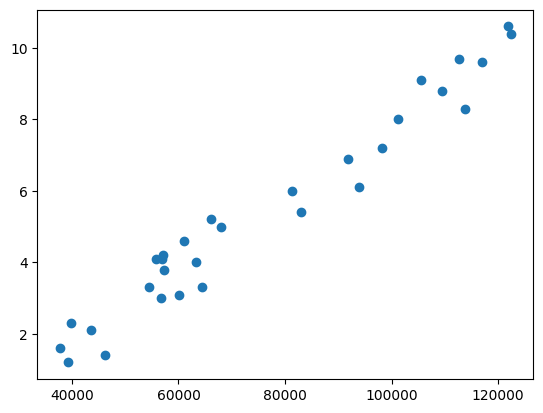

In [15]:
plt.scatter(X, y)

In [16]:
# დაყოფილაი სატესტოდ და სატრენინგოდ მონაცემები
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train

array([ 9.7,  4.1,  5.4,  8. ,  3. ,  5.2,  3.3,  4.6,  8.3,  6.9,  1.4,
       10.6,  3.1,  2.3,  6. ,  6.1,  3.8,  3.3,  9.1,  2.1,  1.2,  7.2,
        5. ,  4.1])

In [17]:
regressorResult = LinearRegression()
regressorResult.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressorResult.predict(X_test)
y_pred

array([ 1.50423128, 10.06057197,  3.45987966,  4.08012845,  9.51258615,
        8.75074235])

In [19]:
print(regressorResult.coef_)
m = regressorResult.coef_[0]
m

[0.00010107]


0.00010106710004999268

In [20]:
print(regressorResult.intercept_)
c = regressorResult.intercept_

-2.309232543706318


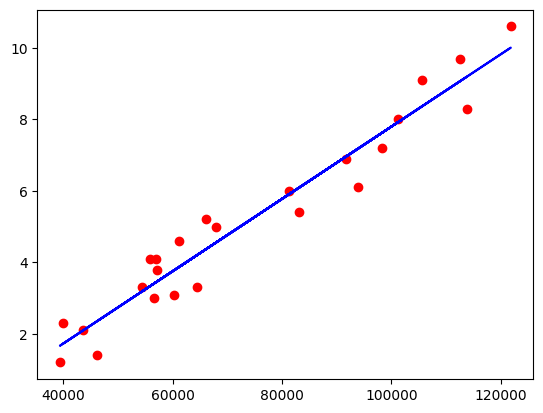

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressorResult.predict(X_train), color = 'blue')

2. გამოიყენეთ მრავალ ცვლადიანი რეგრესიის მოდელი (Multiple linear Regression). გამოთვალეთ
მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [23]:
wineData = pd.read_csv("./winequality-red.csv");
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
X=wineData.iloc[:, :-1].values
X

y = wineData.iloc[:, 10].values
y

array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ])

In [25]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

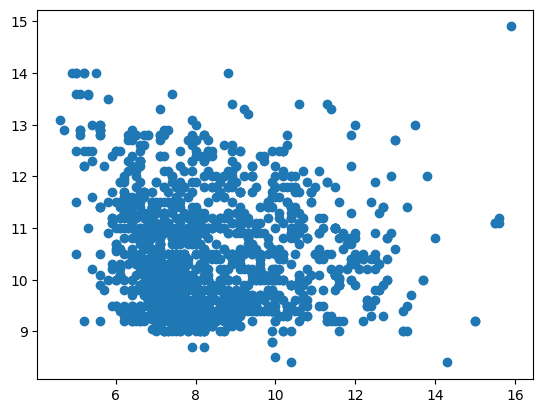

In [26]:
plt.scatter(X[:,0], y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)
y_pred

array([10.8 ,  9.6 , 11.7 , 10.  , 10.4 ,  9.1 ,  9.9 , 10.9 ,  9.6 ,
        9.3 ,  9.4 , 10.2 , 10.7 , 11.5 , 10.2 , 11.4 , 12.8 , 10.5 ,
       12.1 ,  9.  , 12.7 ,  9.4 , 10.5 , 11.5 ,  9.8 ,  9.9 ,  9.7 ,
       12.1 ,  9.4 , 12.8 , 10.4 , 10.8 , 10.6 ,  9.9 , 12.3 , 11.2 ,
        9.3 ,  9.4 , 12.4 , 11.  ,  9.8 , 11.2 , 13.6 , 12.  , 11.2 ,
        9.2 ,  9.8 , 11.  , 10.5 , 11.2 ,  9.2 ,  9.2 , 10.1 , 12.7 ,
        9.7 , 10.1 ,  9.5 ,  9.4 , 12.  ,  9.6 ,  9.6 , 10.5 , 11.4 ,
       12.7 ,  9.4 , 11.3 , 10.1 , 11.1 , 11.3 , 11.7 , 10.4 ,  9.2 ,
        9.6 , 10.2 , 10.4 , 12.5 ,  9.5 ,  9.4 , 10.5 , 11.5 , 10.5 ,
        9.  , 11.  , 10.9 , 10.4 , 10.1 , 12.1 ,  9.6 ,  9.6 ,  9.3 ,
        9.5 , 10.  , 11.5 , 10.  , 11.  , 10.4 , 11.2 ,  9.6 ,  9.4 ,
        9.4 , 12.6 , 10.6 , 10.9 , 11.2 , 11.  ,  9.5 , 11.  ,  9.7 ,
       11.7 ,  9.5 , 11.1 ,  9.4 , 11.3 ,  9.2 , 10.9 ,  9.9 , 10.  ,
       12.2 , 11.5 , 10.5 ,  9.5 , 10.5 ,  9.2 ,  9.1 , 12.8 , 11.2 ,
        9.5 , 10.  ,

In [29]:
print(regressor.coef_)

[-1.20510288e-15  9.36750677e-16  4.30736210e-15 -9.27196841e-17
 -3.13721204e-15 -3.17128110e-17 -1.41060685e-17  8.99462155e-13
 -4.73655607e-15 -9.40535197e-16  1.00000000e+00]


In [30]:
print(regressor.intercept_)

-8.562039965909207e-13


In [31]:
r2_score(y_test, y_pred)

1.0

3. გამოიყენეთ გადაწყვეტილების ხის რეგრესიის მოდელი ერთ ცვლადზე ან რამდენიმე ცვლადზე
დამოკიდებულებით. გამოთვალეთ მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს
მოგცემთ.



5.გამოიყენეთ გადაწყვეტილების ხის კლასიფიკაციის მოდელი ერთ ცვლადზე ან რამდენიმე
ცვლადზე დამოკიდებულებით. გამოთვალეთ მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა
შედეგს მოგცემთ.

In [32]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import export_graphviz, plot_tree

from sklearn.tree import DecisionTreeRegressor

In [33]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [34]:
salary_array = data["Salary"].astype(int) 
salary_array

0      39344
1      46206
2      37732
3      43526
4      39892
5      56643
6      60151
7      54446
8      64446
9      57190
10     63219
11     55795
12     56958
13     57082
14     61112
15     67939
16     66030
17     83089
18     81364
19     93941
20     91739
21     98274
22    101303
23    113813
24    109432
25    105583
26    116970
27    112636
28    122392
29    121873
Name: Salary, dtype: int64

In [35]:
X = np.array(salary_array).reshape(-1, 1)
X

array([[ 39344],
       [ 46206],
       [ 37732],
       [ 43526],
       [ 39892],
       [ 56643],
       [ 60151],
       [ 54446],
       [ 64446],
       [ 57190],
       [ 63219],
       [ 55795],
       [ 56958],
       [ 57082],
       [ 61112],
       [ 67939],
       [ 66030],
       [ 83089],
       [ 81364],
       [ 93941],
       [ 91739],
       [ 98274],
       [101303],
       [113813],
       [109432],
       [105583],
       [116970],
       [112636],
       [122392],
       [121873]])

In [36]:
years_array = data['YearsExperience'].astype(int) 

# print(y) 

y = np.array(years_array).reshape(-1, 1)
y

array([[ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10]])

In [37]:
regressor = DecisionTreeRegressor(max_depth=3, random_state = 0) 
regressor.fit(X, y) 

DecisionTreeRegressor(max_depth=3, random_state=0)

In [38]:
y_pred = regressor.predict([[67939]]) 
print("Predicted price: % d\n"% y_pred) 

Predicted price:  5



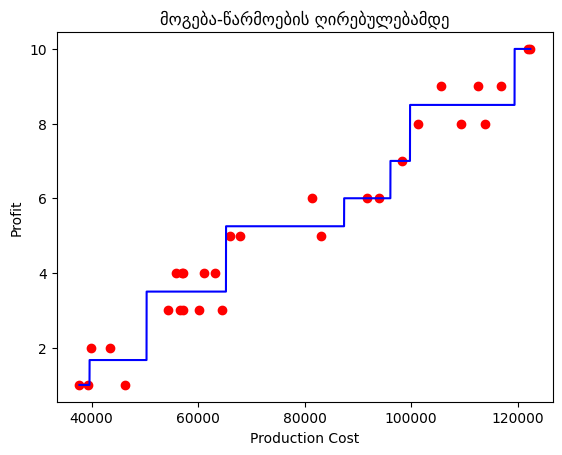

In [39]:
X_grid = np.arange(min(X), max(X), 0.01) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot-ი თავდაპირველი ბაზისთვის
plt.scatter(X, y, color = 'red') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# დასახელება დიაგრამის
plt.title('მოგება-წარმოების ღირებულებამდე') 
plt.xlabel('Production Cost') 
plt.ylabel('Profit') 
plt.show() 

In [40]:
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost']) 

[Text(0.5, 0.875, '[39344] <= 87414.0\nsquared_error = 7.423\nsamples = 30\nvalue = 5.1'),
 Text(0.25, 0.625, '[39344] <= 50326.0\nsquared_error = 2.006\nsamples = 19\nvalue = 3.316'),
 Text(0.125, 0.375, '[39344] <= 39618.0\nsquared_error = 0.24\nsamples = 5\nvalue = 1.4'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.1875, 0.125, 'squared_error = 0.222\nsamples = 3\nvalue = 1.667'),
 Text(0.375, 0.375, '[39344] <= 65238.0\nsquared_error = 0.857\nsamples = 14\nvalue = 4.0'),
 Text(0.3125, 0.125, 'squared_error = 0.25\nsamples = 10\nvalue = 3.5'),
 Text(0.4375, 0.125, 'squared_error = 0.188\nsamples = 4\nvalue = 5.25'),
 Text(0.75, 0.625, '[39344] <= 99788.5\nsquared_error = 1.785\nsamples = 11\nvalue = 8.182'),
 Text(0.625, 0.375, '[39344] <= 96107.5\nsquared_error = 0.222\nsamples = 3\nvalue = 6.333'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 6.0'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 7.0'),
 Text(0.

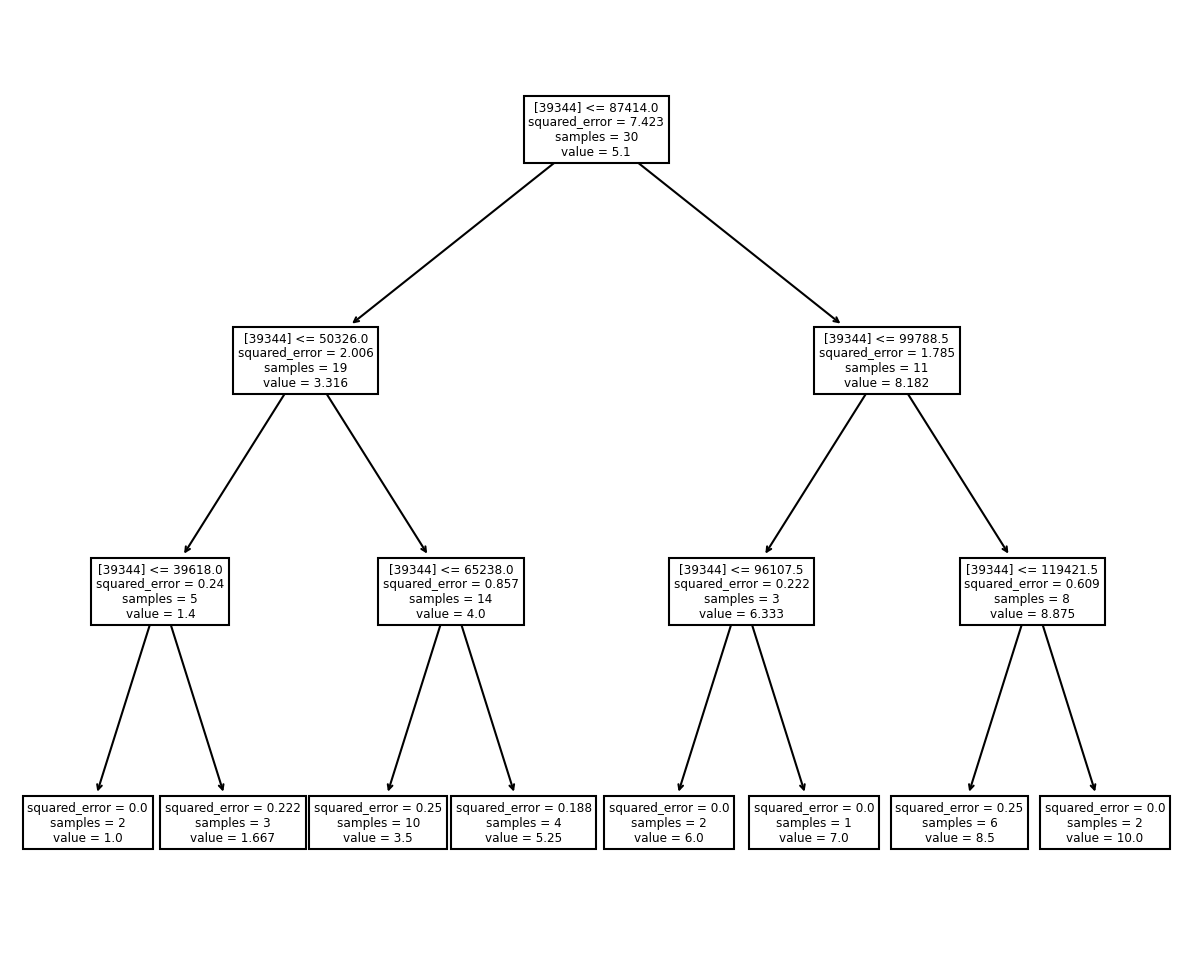

In [41]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(regressor, feature_names=X)

4. გამოიყენეთ ლოგისტიკური რეგრესიის მოდელი. გამოთვალეთ მოდელის ეფექტურობა და
შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

In [42]:
from sklearn.linear_model import LogisticRegression


In [54]:
wineData.head()
X=wineData.iloc[:, :-1].values
X

y = wineData.iloc[:, 10].values
y
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# ლოჯისტიკური რეგრესია ღვინის მონაცემებზე
# სატესტოდ და სატრენინგოდ დაყოფის შემდეგ 
logReggresor = LogisticRegression(random_state=1)
logReggresor.fit(X_train, y_train)

